In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport as pr
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [3]:
df = pd.read_excel("Train.xlsx")
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

VOTES            9.49
CITY             0.88
LOCALITY         0.77
RATING           0.02
TITLE            0.00
RESTAURANT_ID    0.00
CUISINES         0.00
TIME             0.00
COST             0.00
dtype: float64

In [6]:
tt = pd.read_excel("Test.xlsx")
tt.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [7]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [8]:
round(tt.isna().sum() * 100 / len(tt) , 2).sort_values(ascending = False)

VOTES            9.50
CITY             0.83
LOCALITY         0.71
RATING           0.05
TITLE            0.00
RESTAURANT_ID    0.00
CUISINES         0.00
TIME             0.00
dtype: float64

In [8]:
pr(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True , inplace = True)

In [10]:
cats = df.select_dtypes(include = "object").columns.tolist()
cats

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']

In [11]:
ints = tt.select_dtypes(exclude = "object").columns.tolist()
ints

['RESTAURANT_ID']

In [12]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [91]:
for i in df.columns:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The number of missing values are : {df[i].isna().sum()} and the percentage of {df[i].isna().sum() * 100 / len(df)} %")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    if len(df[i].unique()) < 12 :
        plt.figure(figsize = (15 , 6))
        sns.countplot(data = df , x = i , order = df[i].value_counts().index)
        plt.xticks(rotation = -90)
        plt.show()
    print("*"*100)
    print("\n\n")

The number of unique values in TITLE column is/are : 113


The unique values in TITLE column is/are : ['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSER

In [13]:
df_temp_1 = df.copy()

<AxesSubplot:xlabel='COST', ylabel='Density'>

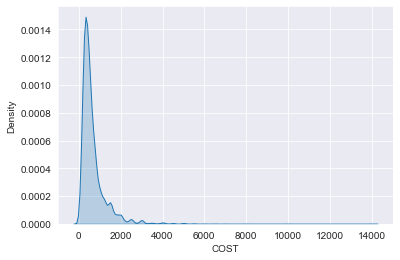

In [15]:
sns.kdeplot(df["COST"] , shade = True)

<AxesSubplot:xlabel='COST'>

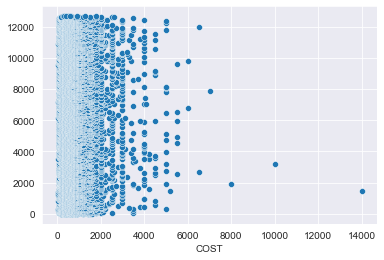

In [16]:
sns.scatterplot(x = df["COST"] , y = df.index)

In [18]:
np.percentile(df["COST"] , [99])[0] * 3

9000.0

In [20]:
df.loc[df["COST"] > 9000]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1475,FINE DINING,4687,"Continental, North Indian",2pm – 11pm (Mon-Sun),Bangalore,Nagawara,3.9,126 votes,14000
3210,FINE DINING,15167,"Japanese, Sushi","12:30pm – 2:45pm, 7pm – 11:45pm (Mon-Sun)",Mumbai,Colaba,4.4,592 votes,10000


In [21]:
df.drop(df.loc[df["COST"] > 9000].index , inplace = True)
df.reset_index(drop = True , inplace = True)

In [22]:
df = df.append(tt , ignore_index = True , sort = False)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
16889,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
16890,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
16891,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
16892,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [23]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
title = te.fit_transform(df["TITLE"].str.split(",")).astype(int)

In [24]:
title

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [25]:
te.columns_

['BAKERY',
 'BAR',
 'BEVERAGE SHOP',
 'BHOJANALYA',
 'CAFÉ',
 'CASUAL DINING',
 'CLUB',
 'COCKTAIL BAR',
 'CONFECTIONERY',
 'DESSERT PARLOR',
 'DHABA',
 'FINE DINING',
 'FOOD COURT',
 'FOOD TRUCK',
 'IRANI CAFE',
 'KIOSK',
 'LOUNGE',
 'MEAT SHOP',
 'MESS',
 'MICROBREWERY',
 'None',
 'PAAN SHOP',
 'PUB',
 'QUICK BITES',
 'SWEET SHOP']

In [26]:
title = pd.DataFrame(title , columns = te.columns_)
title

,BAKERY,BAR,BEVERAGE SHOP,BHOJANALYA,CAFÉ,CASUAL DINING,CLUB,COCKTAIL BAR,CONFECTIONERY,DESSERT PARLOR,...,KIOSK,LOUNGE,MEAT SHOP,MESS,MICROBREWERY,None,PAAN SHOP,PUB,QUICK BITES,SWEET SHOP
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16889,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
te = TransactionEncoder()
cusines = te.fit_transform(df["CUISINES"].str.split(", ")).astype(int)

In [28]:
cusines

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
te.columns_

[',',
 'Afghan',
 'African',
 'American',
 'American,',
 'Andhra',
 'Arabian',
 'Arabian,',
 'Armenian',
 'Asian',
 'Asian,',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Bengali,',
 'Beverages',
 'Beverages,',
 'Bihari',
 'Biryani',
 'Biryani,',
 'Bohri',
 'Brazilian',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cafe Food',
 'Cafe Food,',
 'Cantonese',
 'Charcoal Chicken',
 'Charcoal Chicken,',
 'Chettinad',
 'Chinese',
 'Chinese,',
 'Coffee',
 'Coffee and Tea',
 'Continental',
 'Continental,',
 'Cuisine Varies',
 'Desserts',
 'Desserts,',
 'Drinks Only',
 'Dumplings,',
 'Egyptian',
 'Ethiopian',
 'European',
 'European,',
 'Falafel',
 'Fast Food',
 'Fast Food,',
 'Finger Food',
 'Finger Food,',
 'Fish and Chips',
 'French',
 'Fusion',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Hawaiian',
 'Healthy Food',
 'Healthy Food,',
 'Hot Pot',
 'Hot dogs',
 'Hyderabadi',
 'Hyderabadi,',
 'Ice Cream',
 'Ice Cream,',
 'Indian',
 '

In [30]:
drop_cusines = ["American" , "Arabian" , "Asian" , "Bengali" , "Beverages" , "Biryani" ,
                "Continental" , "Cafe Food" , "Charcoal Chicken" , "Chinese" , "Desserts" , "European" , 
                "Fast Food" , "Finger Food" , "Healthy Food" , "Hyderabadi" , "Ice Cream" , 
                "Italian" , "Japanese" , "Kebab" , "Lebanese" , "Lucknowi" , "Malaysian" , "Mughlai" , 
                "Mediterranean" , "Middle Eastern" , "Modern Indian" , "Momos" , "North Indian" , 
                "Pizza" , "Salad" , "Sandwich" , "Seafood" , "South Indian"]

In [31]:
cusines = pd.DataFrame(cusines , columns = te.columns_)
cusines

,",",Afghan,African,American,"American,",Andhra,Arabian,"Arabian,",Armenian,Asian,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
cusines.drop([","] , axis = 1 , inplace = True)
for i in drop_cusines:
    cusines[i] = cusines[i] + cusines[f"{i},"]
    cusines.drop([f"{i},"] , axis = 1 , inplace = True)

In [33]:
cusines

,Afghan,African,American,Andhra,Arabian,Armenian,Asian,Assamese,Awadhi,BBQ,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
cusines.columns.tolist()

['Afghan',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Armenian',
 'Asian',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'Brazilian',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cafe Food',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Coffee and Tea',
 'Continental',
 'Cuisine Varies',
 'Desserts',
 'Drinks Only',
 'Dumplings,',
 'Egyptian',
 'Ethiopian',
 'European',
 'Falafel',
 'Fast Food',
 'Finger Food',
 'Fish and Chips',
 'French',
 'Fusion',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Hawaiian',
 'Healthy Food',
 'Hot Pot',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Irish',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Juices,',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexic

In [35]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [36]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4231
dtype: int64

In [37]:
df_temp_2 = df.copy()

In [61]:
df["VOTES"] = df["VOTES"].str.split(" ").str[0].astype(float)
df["RATING"] = df["RATING"].replace("NEW" , np.nan)
df["RATING"] = df["RATING"].replace("-" , np.nan)
df["RATING"] = df["RATING"].astype(float)

In [62]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING           1602
VOTES            1602
COST             4231
dtype: int64

<AxesSubplot:xlabel='VOTES'>

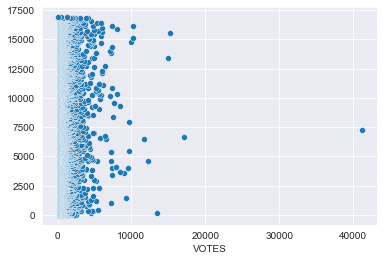

In [63]:
sns.scatterplot(x = df["VOTES"] , y = df.index)

In [64]:
df.loc[df["VOTES"] > 10000]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
196,"LOUNGE,CASUAL DINING",5646,"Continental, American, Asian, North Indian, Ch...",11am – 12:30AM (Mon-Sun),New Delhi,Hauz Khas Village,4.6,13500.0,1300.0
4572,CASUAL DINING,201,"European, Mediterranean, North Indian, BBQ","12noon – 4pm, 6:30pm – 12midnight (Mon-Sun)",Bangalore,Marathahalli,4.9,12307.0,1600.0
6512,CASUAL DINING,11889,"Biryani, North Indian, Chinese",12noon – 2am (Mon-Sun),Hyderabad,Gachibowli,4.2,11753.0,800.0
6683,MICROBREWERY,2284,"Continental, North Indian, Italian, South Indi...",12:30pm – 1am (Mon-Sun),Bangalore,Sarjapur Road,4.9,17060.0,1600.0
7255,CASUAL DINING,1534,"Biryani, Hyderabadi, North Indian, Seafood","11:30am – 11:30pm (Mon-Sat),11:30am – 12midnig...",Hyderabad,Nallakunta,4.4,41186.0,750.0
13393,"CAFÉ,CASUAL DINING",14621,"Cafe, American, Burger, Steak",12noon – 10:30pm (Mon-Sun),Bangalore,Koramangala 5th Block,4.7,14910.0,NaN
15149,CAFÉ,2669,"Cafe, Italian, North Indian, Desserts","Closed (Mon),8:30am – 10pm (Tue-Sun)",Bandra West,Pali Hill,4.2,10192.0,NaN
15506,MICROBREWERY,14536,"Italian, American, Pizza","12noon – 12midnight (Mon-Tue),12noon – 1am...",Bangalore,Indiranagar,4.7,15205.0,NaN
16183,CASUAL DINING,8032,"Biryani, North Indian, Chinese",12noon – 11pm (Mon-Sun),Hyderabad,Nagole,4.2,10159.0,NaN


In [65]:
df["VOTES"].loc[df["VOTES"] > 10000] = 10000

In [66]:
%%time

df['RATING'] = df.groupby(["RESTAURANT_ID"]).progress_transform(lambda x: x.fillna(x.mean()))['RATING']

  0%|          | 0/15572 [00:00<?, ?it/s]

Wall time: 9.83 s


In [67]:
%%time

df['VOTES'] = df.groupby(["RESTAURANT_ID"]).progress_transform(lambda x: x.fillna(x.mean()))['VOTES']

  0%|          | 0/15572 [00:00<?, ?it/s]

Wall time: 10.4 s


In [68]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING           1465
VOTES            1465
COST             4231
dtype: int64

In [69]:
df["RATING"].median() , df["RATING"].mean() , df["VOTES"].median() , df["VOTES"].mean()

(3.8, 3.7833042446351968, 164.0, 414.53717643645706)

<AxesSubplot:xlabel='VOTES', ylabel='Density'>

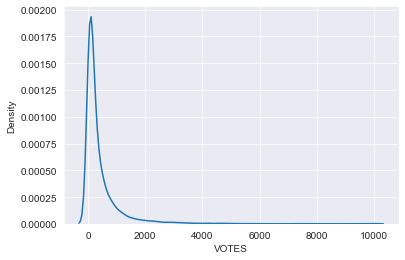

In [70]:
sns.kdeplot(df["VOTES"])

<AxesSubplot:xlabel='VOTES'>

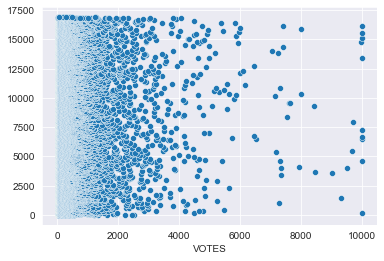

In [71]:
sns.scatterplot(x = df["VOTES"] , y = df.index)

In [72]:
df["VOTES"].skew()

5.330239202212328

In [74]:
import re
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'

df['CLOSED'] = df['TIME'].apply(extract_closed)

In [77]:
def cleaning(x):
    if x != "NA":
        return x[7:]
    else:
        return x

In [78]:
df["CLOSED"] = df["CLOSED"].apply(cleaning)

In [79]:
df["CLOSED"].value_counts()

NA                                16438
(Mon)                               277
(Sun)                               127
(Mon, Tue, Wed, Thu, Sun)             7
(Sat-Sun)                             6
(Mon-Tue)                             6
(Tue)                                 5
(Mon-Thu)                             3
(Mon, Sat)                            3
(Mon, Tue, Sun)                       3
(Fri-Sun)                             3
(Mon, Sun)                            2
(Wed)                                 2
(Mon, Thu)                            2
(Mon, Wed, Thu, Sat)                  1
(Mon, Tue, Thu, Sun)                  1
(Mon, Tue, Wed, Thu, Fri, Sun)        1
(Sat)                                 1
(Mon, Fri)                            1
(Mon, Wed, Thu, Sun)                  1
(Thu-Sun)                             1
(Wed-Sun)                             1
(Mon, Tue, Thu, Fri, Sat, Sun)        1
(Mon, Tue, Thu)                       1
Name: CLOSED, dtype: int64

In [80]:
df["CITY"].fillna("Unknown" , inplace = True)
df["LOCALITY"].fillna("Unknown" , inplace = True)
df["RATING"].fillna(df["RATING"].mean() , inplace = True)
df["VOTES"].fillna(df["VOTES"].median() , inplace = True)

In [81]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
CLOSED              0
dtype: int64

In [82]:
df_temp_3 = df.copy()

In [83]:
agg_func = {
    'VOTES': ['mean','median'],
    'RATING': ['mean','median']
    
}
agg_city = df.groupby('CITY').agg(agg_func)
agg_city.columns = [ 'CITY_' + ('_'.join(col).strip()) for col in agg_city.columns.values]
agg_city.reset_index(inplace=True)

In [84]:
agg_city

,CITY,CITY_VOTES_mean,CITY_VOTES_median,CITY_RATING_mean,CITY_RATING_median
0,10th avenue,33.000000,33.0,3.600000,3.6
1,1st Stage,98.666667,37.0,3.766667,3.8
2,1st Tavarekere,171.000000,171.0,3.400000,3.4
3,3rd Street,859.000000,859.0,4.300000,4.3
4,5th Main Teachers Colony Koramangala Block 1 B...,127.000000,127.0,4.100000,4.1
...,...,...,...,...,...
446,opp gurudwara Shakurpur,245.000000,245.0,3.800000,3.8
447,opp mukteshwar ashram powai,712.000000,712.0,4.700000,4.7
448,opposite to western side of ITPL Service gate,9.000000,9.0,3.600000,3.6
449,p.o Kochi,18.000000,18.0,3.200000,3.2


In [85]:
df = df.merge(agg_city, on=["CITY"], how='left')

In [86]:
agg_func = {
    'VOTES': ['mean','median'],
    'RATING': ['mean','median']
    
}
agg_locality = df.groupby('LOCALITY').agg(agg_func)
agg_locality.columns = [ 'LOCALITY_' + ('_'.join(col).strip()) for col in agg_locality.columns.values]
agg_locality.reset_index(inplace=True)

In [87]:
agg_locality

,LOCALITY,LOCALITY_VOTES_mean,LOCALITY_VOTES_median,LOCALITY_RATING_mean,LOCALITY_RATING_median
0,(Main Market) Mayur Vihar Phase 2,392.0,392.0,4.000000,4.000000
1,(ground floor of Sunrise Chambers),454.0,454.0,4.200000,4.200000
2,1 st Cross street,22.0,22.0,3.600000,3.600000
3,1-7-172/1 Ecil Opposite,63.0,63.0,3.800000,3.800000
4,100 Ft Road,38.0,38.0,3.000000,3.000000
...,...,...,...,...,...
1632,seawoods grand central mall,891.0,891.0,3.900000,3.900000
1633,sector 42,164.0,164.0,3.783304,3.783304
1634,sholinganallur,261.0,261.0,2.900000,2.900000
1635,shop 7 shikrupa socity,486.0,486.0,4.100000,4.100000


In [88]:
df = df.merge(agg_locality, on=["LOCALITY"], how='left')

In [89]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_VOTES_mean,CITY_VOTES_median,CITY_RATING_mean,CITY_RATING_median,LOCALITY_VOTES_mean,LOCALITY_VOTES_median,LOCALITY_RATING_mean,LOCALITY_RATING_median
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA,227.512931,164.0,3.909478,3.9,225.428571,164.0,3.667617,3.70
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA,210.342151,83.0,3.632612,3.6,110.259259,82.5,3.575308,3.60
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,NA,210.342151,83.0,3.632612,3.6,90.833333,80.0,3.550000,3.65
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,NA,566.123859,278.0,3.923270,3.9,563.243243,270.5,4.022519,4.00
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,NA,566.123859,278.0,3.923270,3.9,1087.370370,760.0,4.093415,4.10


In [90]:
df.isna().sum()

TITLE                        0
RESTAURANT_ID                0
CUISINES                     0
TIME                         0
CITY                         0
LOCALITY                     0
RATING                       0
VOTES                        0
COST                      4231
CLOSED                       0
CITY_VOTES_mean              0
CITY_VOTES_median            0
CITY_RATING_mean             0
CITY_RATING_median           0
LOCALITY_VOTES_mean          0
LOCALITY_VOTES_median        0
LOCALITY_RATING_mean         0
LOCALITY_RATING_median       0
dtype: int64

In [91]:
df_temp_4 = df.copy()

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range = (1, 1) , lowercase = True)
df_city = tf1.fit_transform(df['CITY'])
df_city = pd.DataFrame(data = df_city.toarray() , columns = tf1.get_feature_names())

tf2 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_locality = tf2.fit_transform(df['LOCALITY'])
df_locality = pd.DataFrame(data = df_locality.toarray() , columns = tf2.get_feature_names())

In [93]:
df_city

,040,092,102,10th,110,110011,110024,110075,110085,119,...,vyttila,wagle,ward,ware,we,west,western,whitefield,x11,yousufguda
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
16890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
16891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
16892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [94]:
df_locality

,01,10,100,104,10th,11,110,110009,11th,12,...,yelahanka,yeshwantpur,ymca,yoga,yousufguda,yusuf,yyavoo,zachariah,zakir,zehra
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
df = pd.concat([df , df_city , df_locality , title , cusines] , axis = 1)

In [96]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA,...,0,0,0,0,0,0,0,0,0,0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA,...,0,0,0,0,0,0,0,0,0,0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,NA,...,0,0,0,0,0,0,0,0,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,NA,...,0,0,0,0,0,1,0,0,0,0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,NA,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df_temp_5 = df.copy()

In [98]:
df.drop(["TITLE" , "RESTAURANT_ID" , "CUISINES" , "TIME" , "CITY" , "LOCALITY"] , axis = 1 , inplace = True)

In [99]:
df = pd.get_dummies(df , columns = ["CLOSED"])

In [100]:
df["COST"] = df["COST"].astype(float)

In [101]:
tt = df[df['COST'].isnull() == True]
df = df[df['COST'].isnull() != True]
tt.drop('COST', axis = 1 , inplace = True)

In [102]:
df = df.loc[:,~df.columns.duplicated()]
tt = tt.loc[:,~tt.columns.duplicated()]

In [103]:
df.head()

,RATING,VOTES,COST,CITY_VOTES_mean,CITY_VOTES_median,CITY_RATING_mean,CITY_RATING_median,LOCALITY_VOTES_mean,LOCALITY_VOTES_median,LOCALITY_RATING_mean,...,CLOSED_(Mon-Thu),CLOSED_(Mon-Tue),CLOSED_(Sat),CLOSED_(Sat-Sun),CLOSED_(Sun),CLOSED_(Thu-Sun),CLOSED_(Tue),CLOSED_(Wed),CLOSED_(Wed-Sun),CLOSED_NA
0,3.6,49.0,1200.0,227.512931,164.0,3.909478,3.9,225.428571,164.0,3.667617,...,0,0,0,0,0,0,0,0,0,1
1,4.2,30.0,1500.0,210.342151,83.0,3.632612,3.6,110.259259,82.5,3.575308,...,0,0,0,0,0,0,0,0,0,1
2,3.8,221.0,800.0,210.342151,83.0,3.632612,3.6,90.833333,80.0,3.550000,...,0,0,0,0,0,0,0,0,0,1
3,4.1,24.0,800.0,566.123859,278.0,3.923270,3.9,563.243243,270.5,4.022519,...,0,0,0,0,0,0,0,0,0,1
4,3.8,165.0,300.0,566.123859,278.0,3.923270,3.9,1087.370370,760.0,4.093415,...,0,0,0,0,0,0,0,0,0,1


In [104]:
X = df.drop(["COST"] , axis = 1)
y = df["COST"]

In [105]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(10130, 2533, 10130, 2533)

In [106]:
ints = df.columns.tolist()[:11]
ints.remove("COST")
ints

['RATING',
 'VOTES',
 'CITY_VOTES_mean',
 'CITY_VOTES_median',
 'CITY_RATING_mean',
 'CITY_RATING_median',
 'LOCALITY_VOTES_mean',
 'LOCALITY_VOTES_median',
 'LOCALITY_RATING_mean',
 'LOCALITY_RATING_median']

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [108]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error
from sklearn.model_selection import cross_val_score

In [109]:
models = []
models.append(('XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')))
models.append(("CatBoost Regressor" , CatBoostRegressor(random_state = 42 , verbose = 0 , eval_metric = "RMSE" , allow_writing_files = False)))
models.append(("Light GBMRegressor" , LGBMRegressor(n_estimators = 200 , random_state = 42)))
models.append(("Gradient Boosting" , GradientBoostingRegressor(n_estimators = 200 , random_state = 42)))
models.append(("ExtraTrees Regressor" , ExtraTreesRegressor(n_estimators = 200 , random_state = 42)))
models.append(("Bagging Regressor" , BaggingRegressor(n_estimators = 200 , random_state = 42)))
models.append(('RandomForest Regressor', RandomForestRegressor(n_estimators = 200 , random_state = 42)))

In [110]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    
    if not params:
        accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 5)
        
    score = 1 - np.sqrt(np.square(np.log10(preds +1) - np.log10(y_test +1)).mean())
    
    print("\n")            
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    if not params : 
        print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
        print("\n")
    
        print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
        print("\n")
    
    print(f"Score : {score:.4f}")
    print("\n")            
    
    plt.figure(figsize = (10 , 6))
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    if not params:
        sam.append(np.mean(accuracies))
        sam.append(np.std(accuracies))
    sam.append(score)
    
    return sam , mod



XGBRegressor


Training score : 0.9002


Test Score : 0.7839


K-fold accuracy : 0.7520


Standard Deviation of Accuracies in k-fold : 0.0179


Score : 0.8366




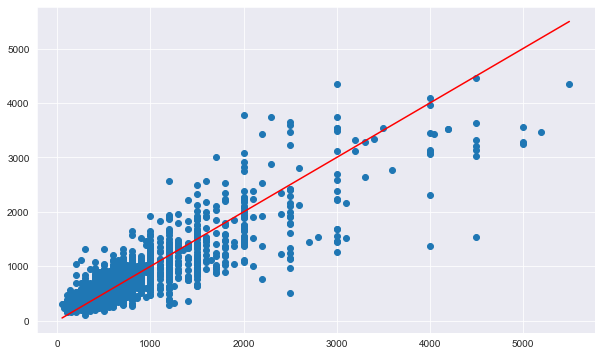



****************************************************************************************************



Wall time: 1min 27s


In [111]:
%%time

pre_final = []
sam = metrics(models[0] , X_train , y_train , X_test , y_test)
pre_final.append(sam)



CatBoost Regressor


Training score : 0.8847


Test Score : 0.7388


K-fold accuracy : 0.7562


Standard Deviation of Accuracies in k-fold : 0.0448


Score : 0.8269




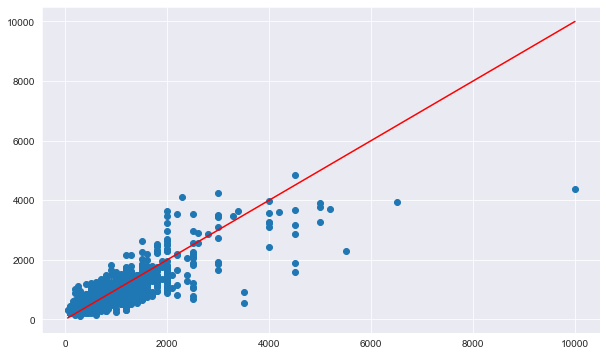



****************************************************************************************************



Wall time: 56 s


In [213]:
%%time

sam = metrics(models[1] , X_train , y_train , X_test , y_test)
pre_final.append(sam)



Gradient Boosting


Training score : 0.8381


Test Score : 0.7063


K-fold accuracy : 0.7424


Standard Deviation of Accuracies in k-fold : 0.0495


Score : 0.8183




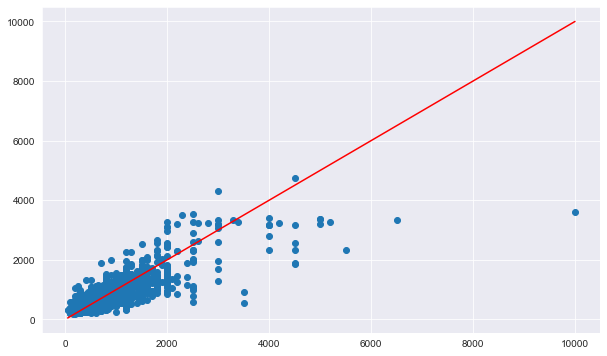



****************************************************************************************************



Wall time: 3min 38s


In [214]:
%%time

sam = metrics(models[3] , X_train , y_train , X_test , y_test)
pre_final.append(sam)



ExtraTrees Regressor


Training score : 0.9997


Test Score : 0.7122


K-fold accuracy : 0.7263


Standard Deviation of Accuracies in k-fold : 0.0372


Score : 0.8255




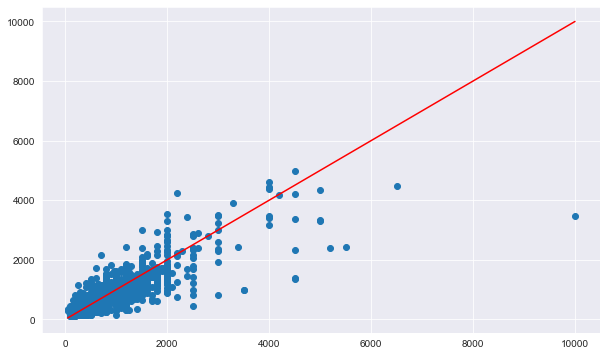



****************************************************************************************************



Wall time: 16min 37s


In [215]:
%%time

sam = metrics(models[4] , X_train , y_train , X_test , y_test)
pre_final.append(sam)



Bagging Regressor


Training score : 0.9664


Test Score : 0.7792


K-fold accuracy : 0.7608


Standard Deviation of Accuracies in k-fold : 0.0145


Score : 0.8389




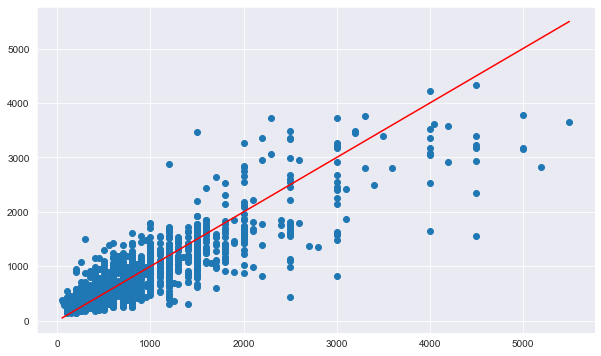



****************************************************************************************************



Wall time: 14min 13s


In [112]:
%%time

sam = metrics(models[5] , X_train , y_train , X_test , y_test)
pre_final.append(sam)



RandomForest Regressor


Training score : 0.9666


Test Score : 0.7233


K-fold accuracy : 0.7523


Standard Deviation of Accuracies in k-fold : 0.0422


Score : 0.8306




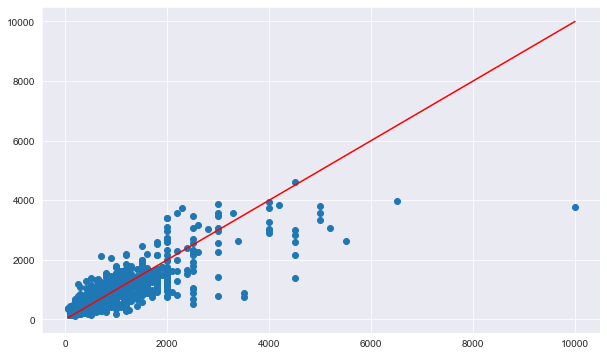



****************************************************************************************************



Wall time: 10min 59s


In [217]:
%%time

sam = metrics(models[6] , X_train , y_train , X_test , y_test)
pre_final.append(sam)

In [218]:
data_pre_final = [x[0] for x in pre_final]

In [220]:
## Run The above cells , this cell is from previous version

me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "Evaluation_Score"])

me.sort_values(by = ["Evaluation_Score", "K-fold Accuracy" ,  "Train Score" , "Test Score"] , inplace = True , ascending = (False , False , False , False))
me = me.reset_index(drop = True)

me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,Evaluation_Score
0,Bagging Regressor,0.966515,0.725250,0.751728,0.042678,0.831000
1,RandomForest Regressor,0.966607,0.723339,0.752275,0.042208,0.830637
2,XGBRegressor,0.912123,0.719858,0.741519,0.042028,0.827455
3,CatBoost Regressor,0.884681,0.738792,0.756241,0.044826,0.826940
4,ExtraTrees Regressor,0.999742,0.712165,0.726257,0.037235,0.825548
5,Gradient Boosting,0.838078,0.706350,0.742380,0.049548,0.818267


In [121]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    temp = pd.DataFrame(list(zip(features , X_train.columns))[:20] , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)
    plt.figure(figsize = (15 , 50))
    sns.set(font_scale = 1)
    sns.barplot(data = temp , y = "Feartures" , x = "Feature Importances")
    plt.show()
    return temp

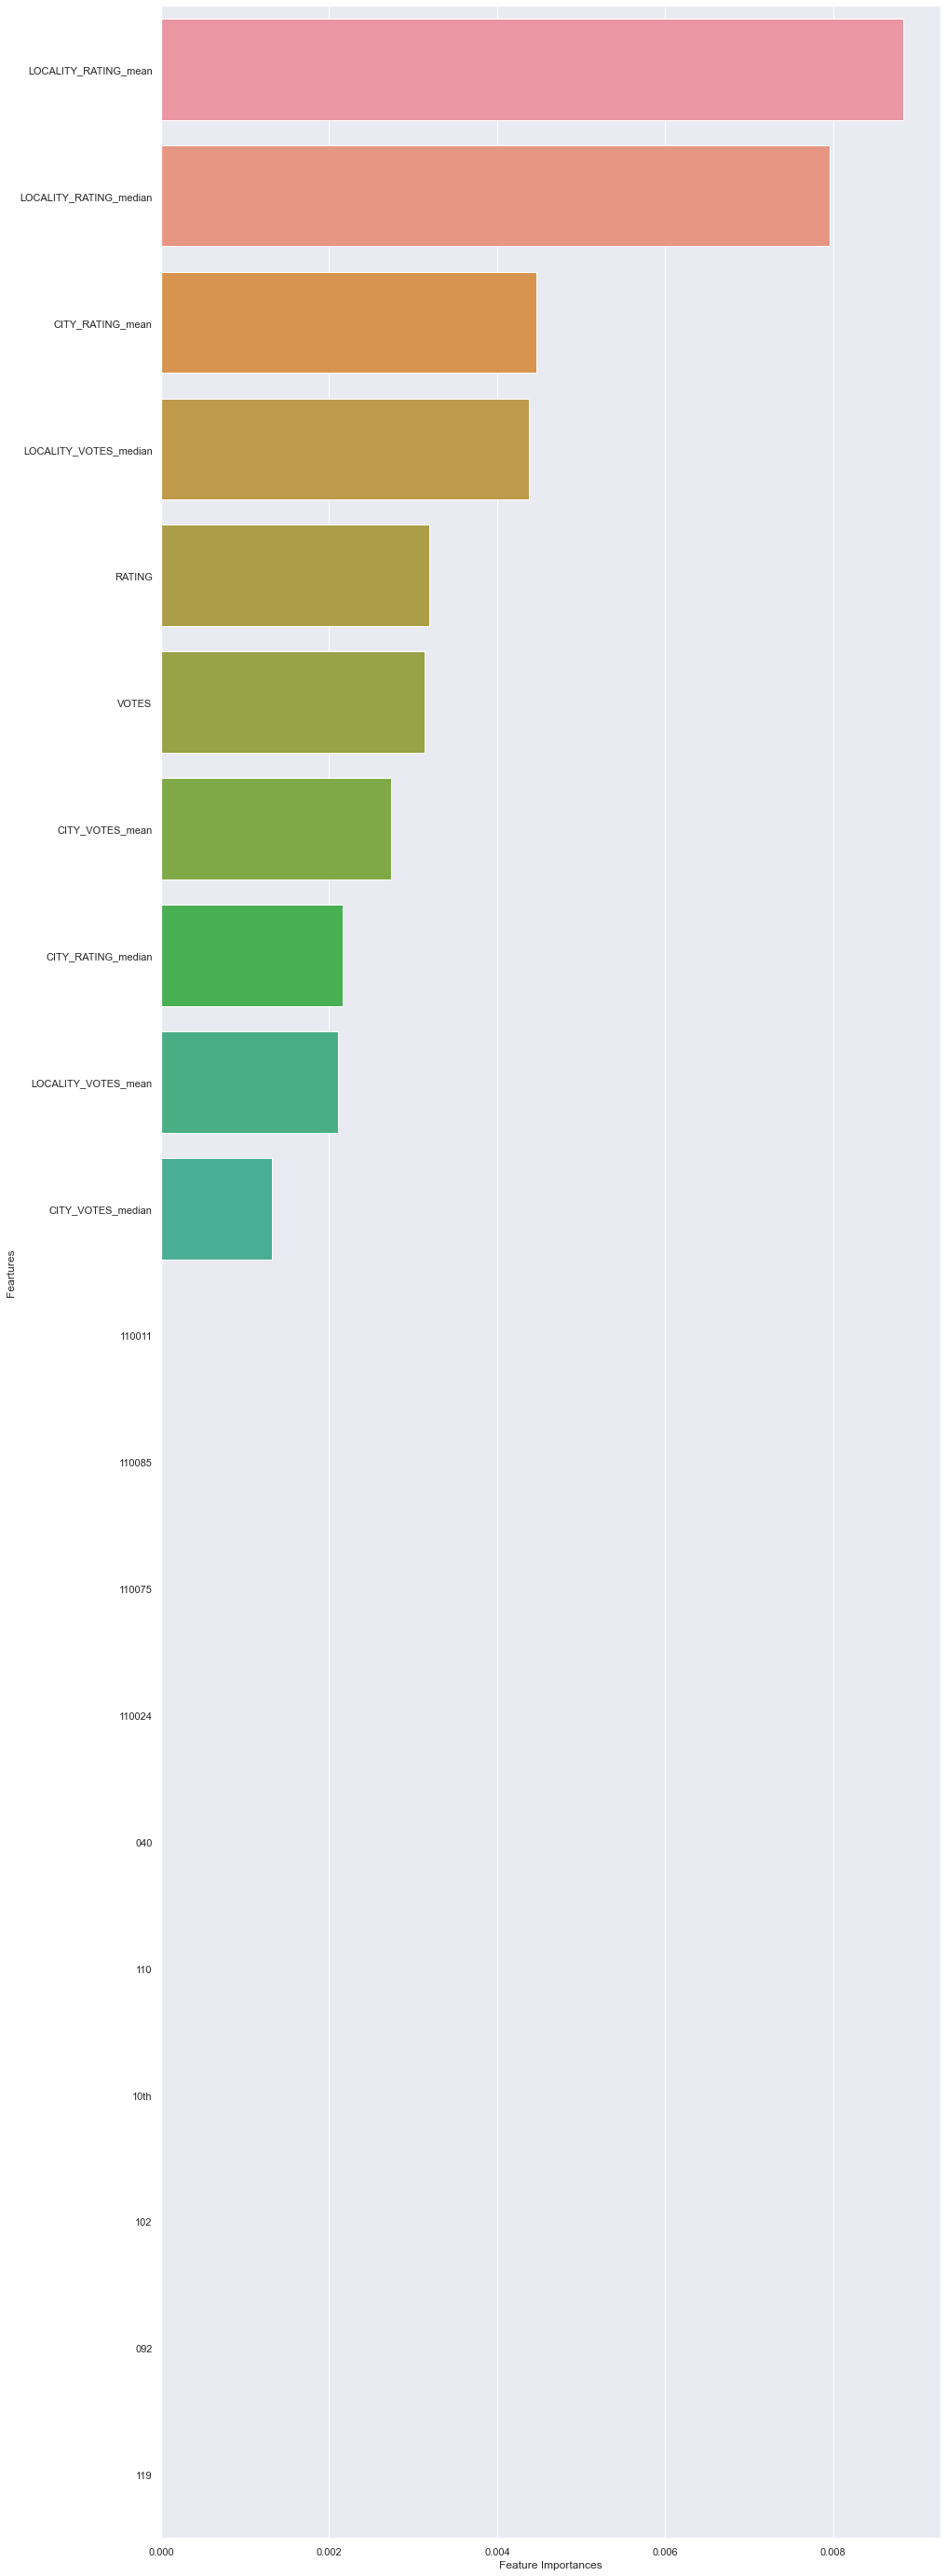

In [123]:
xgb_df = feature_importance(pre_final[0][1] , X_train , y_train)

In [124]:
xgb_df

,Feature Importances,Feartures
0,0.008838,LOCALITY_RATING_mean
1,0.007956,LOCALITY_RATING_median
2,0.004471,CITY_RATING_mean
3,0.004377,LOCALITY_VOTES_median
4,0.003196,RATING
5,0.003139,VOTES
6,0.002740,CITY_VOTES_mean
7,0.002157,CITY_RATING_median
8,0.002100,LOCALITY_VOTES_mean
9,0.001319,CITY_VOTES_median


In [113]:
bag = pre_final[1][1]
bag

BaggingRegressor(n_estimators=200, random_state=42)

In [115]:
np.sqrt(mean_squared_log_error(y_test, bag.predict(X_test)))

0.3708690578593215

In [116]:
preds = bag.predict(tt)
preds

array([1211.        ,  446.5       ,  677.5       , ...,  413.25      ,
        197.15277778,  351.5       ])

In [117]:
final = pd.DataFrame({"COST" : preds})
final

,COST
0,1211.000000
1,446.500000
2,677.500000
3,340.350000
4,243.858333
...,...
4226,713.250000
4227,454.750000
4228,413.250000
4229,197.152778


<AxesSubplot:xlabel='COST'>

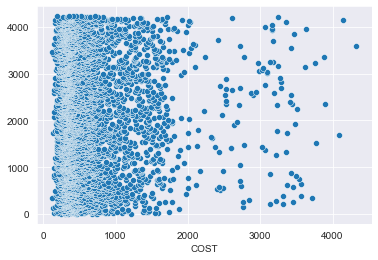

In [118]:
sns.scatterplot(x = final["COST"] , y = final.index)

<AxesSubplot:xlabel='COST', ylabel='Count'>

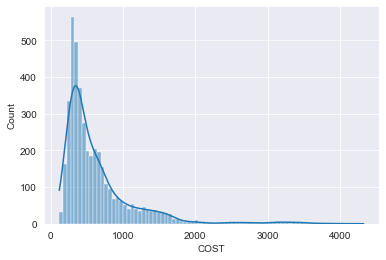

In [119]:
sns.histplot(final["COST"] , kde = True)

In [120]:
final.to_csv("Bagging_2.csv" , index = False)